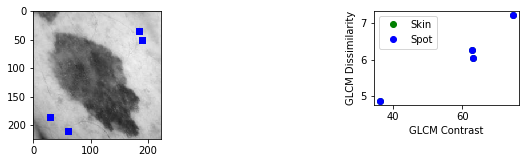

In [10]:
%matplotlib inline

import sys
import matplotlib.pyplot as plt
import numpy

from skimage.feature import greycomatrix, greycoprops
from skimage import data

#numpy.set_printoptions(threshold=sys.maxsize) # permite mostrar todos os dados de um dataframe

PATCH_SIZE = 21

# open the camera image
# image = data.camera()
image = data.load('D:/Repositórios/GitHub/Personal/Unisinos-TopicosEspeciaisII-AnaliseImagens/src/Images/grayscale/Melanoma/AUG_0_8.jpeg', False)
#plt.imshow(image)

# select some patches from grassy areas of the image
skin_locations = [(25, 175), (40, 180), (175, 18), (200, 50)]
skin_patches = []
for loc in skin_locations:
    skin_patches.append(image[loc[0]:loc[0] + PATCH_SIZE, loc[1]:loc[1] + PATCH_SIZE])
    
# select some patches from sky areas of the image
spot_locations = [(25, 175), (40, 180), (175, 18), (200, 50)]
#spot_locations = [(75, 65), (100, 100), (125, 125), (175, 150)]
spot_patches = []
for loc in spot_locations:
     spot_patches.append(image[loc[0]:loc[0] + PATCH_SIZE, loc[1]:loc[1] + PATCH_SIZE])
        
# # compute some GLCM properties each patch
xs = []
ys = []
for patch in (skin_patches + spot_patches):
    glcm = greycomatrix(patch, [5], [0], 256, symmetric=True, normed=True)
    #ys.append(greycoprops(glcm, 'correlation')[0, 0])
    xs.append(greycoprops(glcm, 'contrast')[0, 0])
    ys.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    
# # create the figure
fig = plt.figure(figsize=(12,8))

# # display original image with locations of patches
ax = fig.add_subplot(3, 4, 1)

ax.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)

for (y, x) in skin_locations:
     ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in spot_locations:
     ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')

# ax.set_xlabel('Original Image')
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('image')

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(4, 4, 3)
ax.plot(xs[:len(skin_patches)], ys[:len(skin_patches)], 'go', label='Skin')
ax.plot(xs[len(skin_patches):], ys[len(skin_patches):], 'bo', label='Spot')
ax.set_xlabel('GLCM Contrast')
ax.set_ylabel('GLCM Dissimilarity')
ax.legend()

# # display the image patches
# for i, patch in enumerate(skin_patches):
#     ax = fig.add_subplot(3, 4, len(skin_patches)*1 + i + 1)
#     ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
#     #ax.set_xlabel('Skin %d' % (i + 1))

# for i, patch in enumerate(spot_patches):
#     ax = fig.add_subplot(3, 4, len(spot_patches)*2 + i + 1)
#     ax.imshow(patch, cmap=plt.cm.gray, vmin=0, vmax=255)
#     #ax.set_xlabel('Spot %d' % (i + 1))
    
# # display the patches and plot
# fig.suptitle('Grey level co-occurrence matrix features', fontsize=14)
# plt.show()